In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def extract_err_arr(pth):
    d = json.load(open(pth, "r"))
    return {
        "num_epochs": len(d),
        "err_train": [dd["err_train"] for dd in d],
        "err_test": [dd["err_test"] for dd in d],
        "err_ood": [dd["err_ood"] for dd in d],
    }

In [3]:
def phase_transition_heatmap(acc_list, pool_size_list, name_list, save_to=None):
    fig = plt.figure(figsize=(10, 5))
    gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1)

    ax1 = fig.add_subplot(gs[0, 0])
    num_pools = len(pool_size_list)
    num_epochs = acc_list[0].shape[1]

    sns.heatmap(acc_list[0], ax=ax1, vmin=0, vmax=1, cbar=False)
    ax1.set_ylabel("Pool size", weight="bold")
    ax1.set_yticks(np.arange(0, num_pools, step=5))
    ax1.set_yticklabels([pool_size_list[i] for i in np.arange(0, num_pools, step=5)])
    ax1.set_title(name_list[0], weight="bold")


    ax2 = fig.add_subplot(gs[0, 1])
    sns.heatmap(acc_list[1], ax=ax2, vmin=0, vmax=1, yticklabels=False, cbar=True, cbar_ax=fig.add_subplot(gs[0, 2]))
    ax2.set_title(name_list[1], weight="bold")

    for ax in [ax1, ax2]:
        ticks = np.arange(0, num_epochs + 1, step=num_epochs // 10)
        ax.set_xlabel("Training steps", weight="bold")
        ax.set_xticks(ticks, labels=[f"{k//1000}K" if k > 0 else 0 for k in ticks])
        plt.setp(ax.get_xticklabels(), rotation=0, ha='center')
        ax.xaxis.labelpad = 10
    
    if save_to is not None:
        fig.savefig(save_to, bbox_inches='tight', pad_inches=0)
    
    else:
        plt.show()

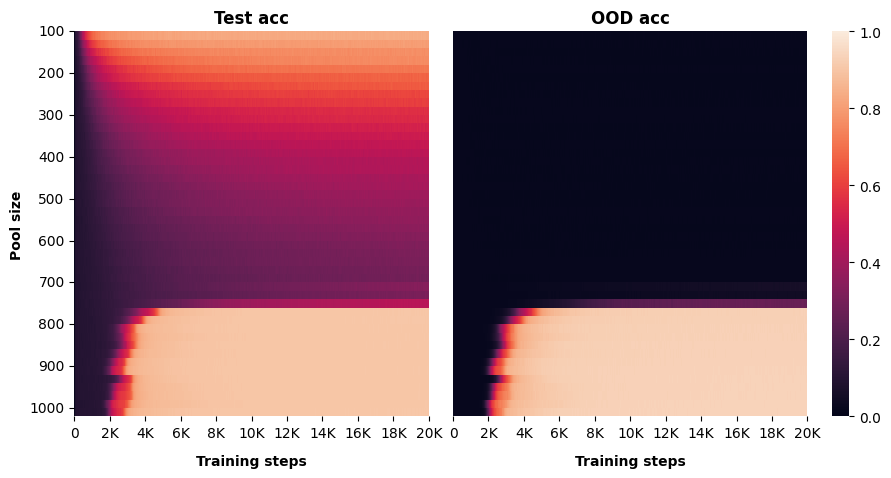

In [4]:
# coarse scale
num_step = 20000
pool_size_list = np.arange(100, 1001, step=20)

err_train = np.zeros((len(pool_size_list), num_step))
err_test = np.zeros((len(pool_size_list), num_step))
err_ood = np.zeros((len(pool_size_list), num_step))

for i, pool_size in enumerate(pool_size_list):
    filename = f"2_layer_vocab_64_{pool_size}_20k"

    d = extract_err_arr(os.path.join(filename, "err_arr.json"))

    err_train[i] = d["err_train"]
    err_test[i] = d["err_test"]
    err_ood[i] = d["err_ood"]

phase_transition_heatmap(
    [1 - err_test, 1 - err_ood],
    pool_size_list,
    ["Test acc", "OOD acc"],
    save_to="phase_transition_heatmap.png"
)